In [145]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
from network import Network
import numpy as np
import seaborn as sns
import pandas as pd
from data_generator import DataGenerator
import matplotlib.pyplot as plt
import config_helper

In [147]:
config_path = "./configs/config1.ini"

### Init datasets and network

In [148]:
train, test, valid = config_helper.get_data_from_config_file(config_path)

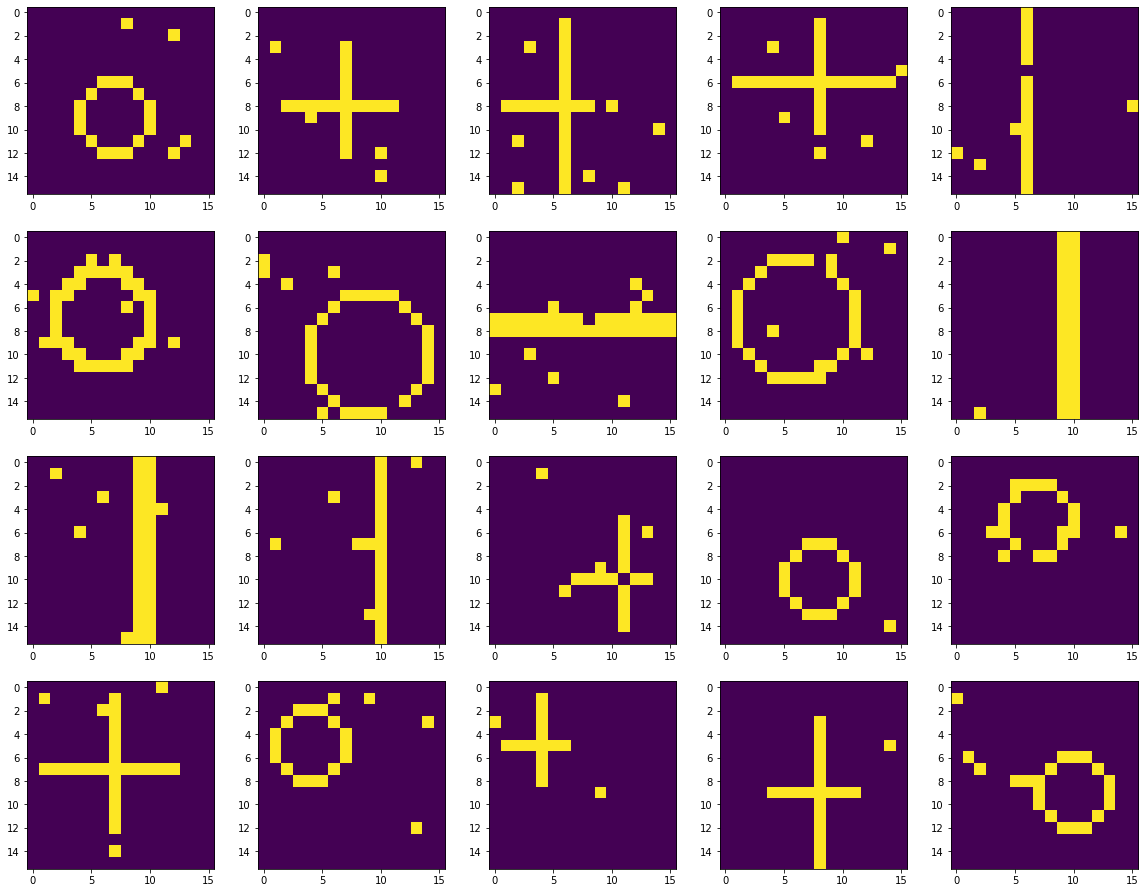

In [149]:
DataGenerator.show20Random(train)

In [150]:
n = Network(config_helper.get_network_from_config_file(config_path))
n

[Layer - shape: (256, 100), f(a): None, activation: <class 'activation_functions.ReLu'>, Layer - shape: (100, 100), f(a): None, activation: <class 'activation_functions.ReLu'>, Layer - shape: (100, 50), f(a): None, activation: <class 'activation_functions.ReLu'>, Layer - shape: (50, 4), f(a): None, activation: <class 'activation_functions.Sigmoid'>] Softmax: False L1: 0.0, L2: 2e-05

In [151]:
run_config = config_helper.get_run_config(config_path)
epochs = int(run_config['epochs'])
epochs

100

### Train the network

In [152]:
train_acc, valid_acc = n.fit(train.x, train.y, valid=valid, epochs=epochs, verbose=False)
df_train = pd.DataFrame(train_acc, columns=['epoch', 'loss'])
df_valid = pd.DataFrame(valid_acc, columns=['epoch', 'loss'])


### Calculate test loss

In [153]:
score = n.test_loss(test)

In [154]:

df = pd.DataFrame()
# df['epoch'] = df_train.epoch
df['Train Loss'] = df_train.loss
df['Validation Loss'] = df_valid.loss
df['Test Loss'] = np.nan
for i in range(5):
    df.loc[len(df.index)] = [np.nan, np.nan, score]


In [155]:
df

,Train Loss,Validation Loss,Test Loss
0,0.745867,0.724690,NaN
1,0.672405,0.686843,NaN
2,0.492209,0.426130,NaN
3,0.354973,0.364294,NaN
4,0.310137,0.319350,NaN
...,...,...,...
100,NaN,NaN,0.050516
101,NaN,NaN,0.050516
102,NaN,NaN,0.050516
103,NaN,NaN,0.050516


### Plot loss
Note that the absolute value of the loss usually will be higher when using Softmax. This is because the values are scaled to sum to 1. The test accuracy will however usually perform good anyway.

<AxesSubplot:>

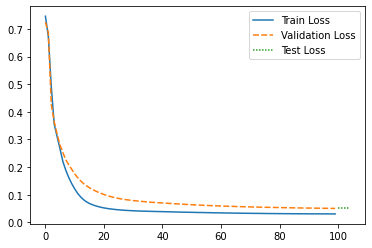

In [156]:
sns.lineplot(data=df )

### Test set accuracy

In [157]:
correct = 0
m = len(test.y)
for x,y in zip(test.x, test.y):

    pred = n.predict(x)
    correct += np.argmax(pred) == np.argmax(y)

    
print(f'{correct} / {m} correct. Accuracy {np.round(correct/m, 3)}')

98 / 100 correct. Accuracy 0.98


### Regularization cost

In [158]:
o1_df = pd.DataFrame(n.omega1, columns=['epoch', 'L1 - loss'])
o2_df = pd.DataFrame(n.omega2, columns=['epoch', 'L2 - loss'])
df_reg = o1_df.merge(o2_df, on='epoch').drop(columns=['epoch'])

<AxesSubplot:>

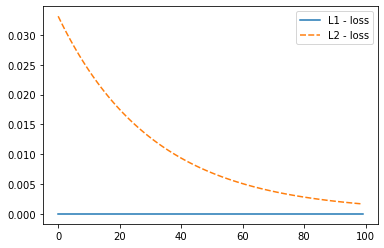

In [159]:
sns.lineplot(data=df_reg)

### Loss including regularization terms

<AxesSubplot:>

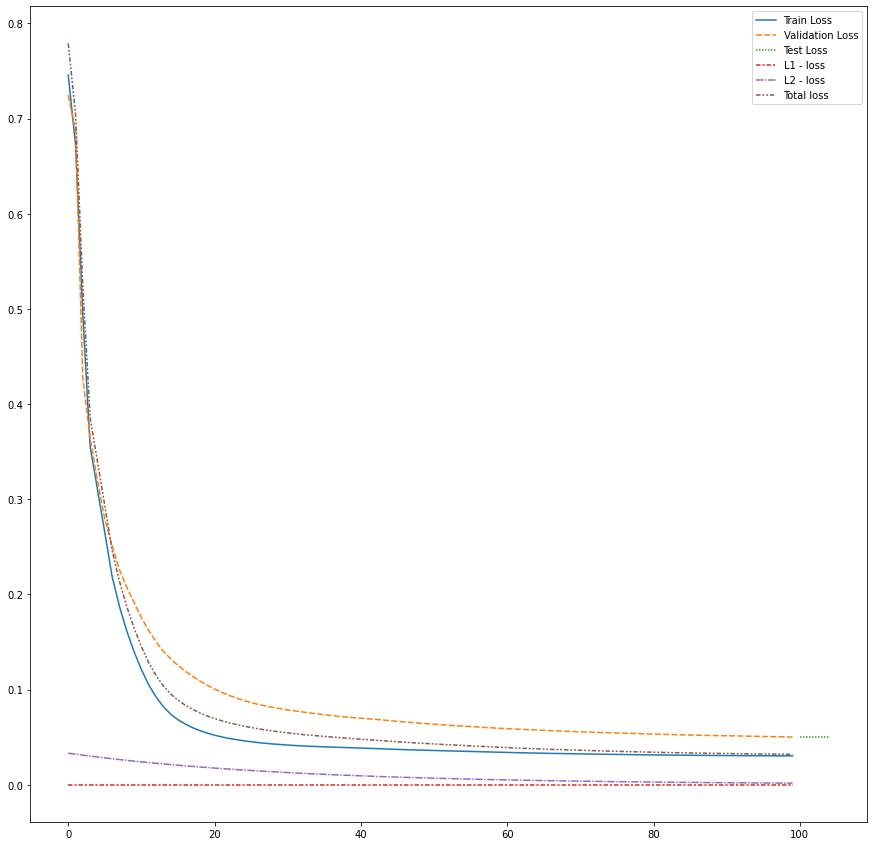

In [160]:
plt.figure(figsize=(15,15))
df2 = df.copy().join(df_reg)
df2['Total loss'] = df['Train Loss'] + o1_df['L1 - loss'] + o2_df['L2 - loss']
sns.lineplot(data=df2)